# Анализ качества красного вина

## Цель:
Изучить и понять, какие физико-химические характеристики вина влияют на его **качество**.

## Задачи: 
* Разведочных анализ данных (EDA)
* Проверка распределений характеристик и выбор мер центральной тенденции
* Построение зависимостей между характеристиками и качеством
* Интерпретация результатов

---

## Описание данных:

**Источник**: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?resource=download

В датасете содержатся только физико-химические показатели вина и его оценка по шкале качества. В датасете нет чувствительных данных (цена закупки вина, марка, сорт винограда и тд)

**Признаки**:
- `fixed acidity` — фиксированная кислотность  
- `volatile acidity` — летучая кислотность  
- `citric acid` — лимонная кислота  
- `residual sugar` — остаточный сахар  
- `chlorides` — хлориды  
- `free sulfur dioxide` — свободный диоксид серы  
- `total sulfur dioxide` — общий диоксид серы  
- `density` — плотность  
- `pH` — уровень кислотности  
- `sulphates` — сульфаты  
- `alcohol` — содержание алкоголя  
- `quality` — оценка качества (0–10, целевая переменная)

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_wine = pd.read_csv('Downloads/winequality-red.csv')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Шаг 0. Первичный анализ

In [250]:
df_wine.info()
df_wine.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Результат**:
* Количество строк: 1599 
* Количество столбцов: 12
* Пропущенные значения отсутствуют. Все химические показатели являются вещественным ТД, а качество – целым ТД. 

## Шаг 1. Общий EDA по всем признакам

Text(0.5, 1.0, 'Тепловая карта')

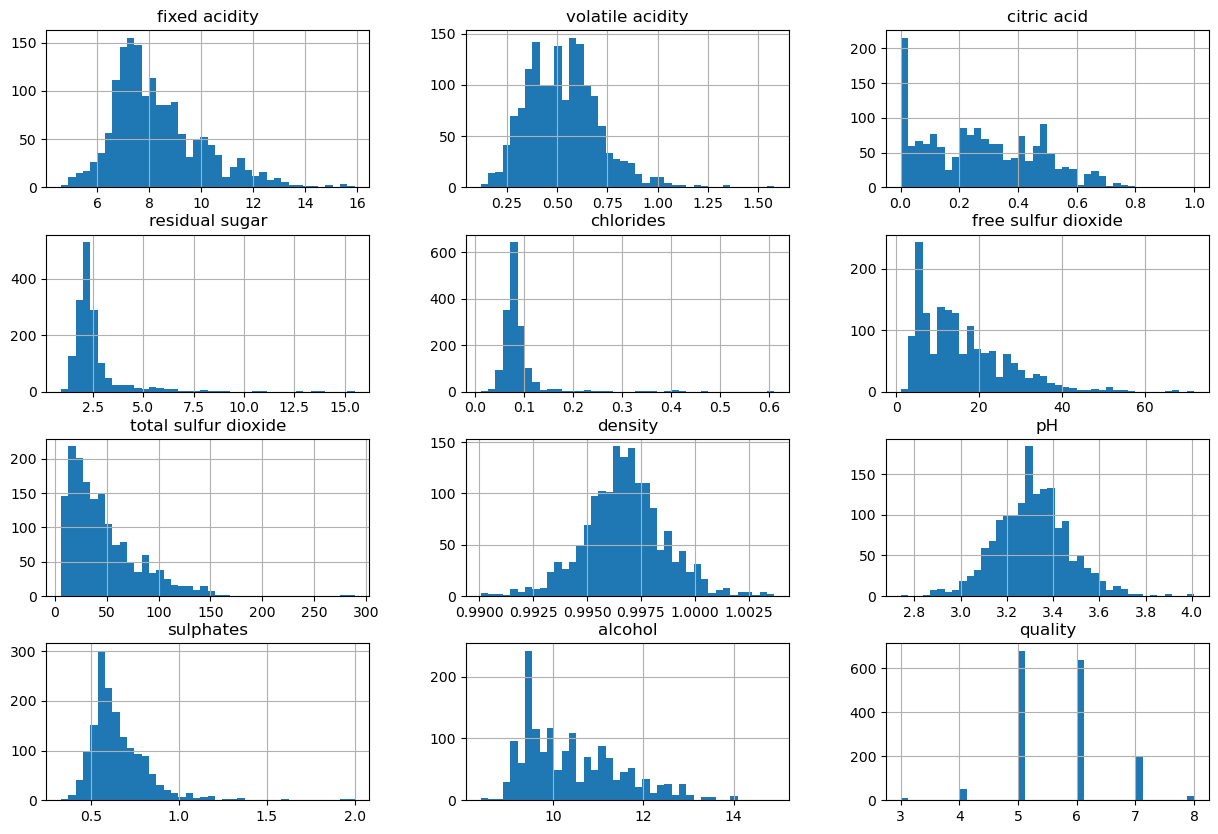

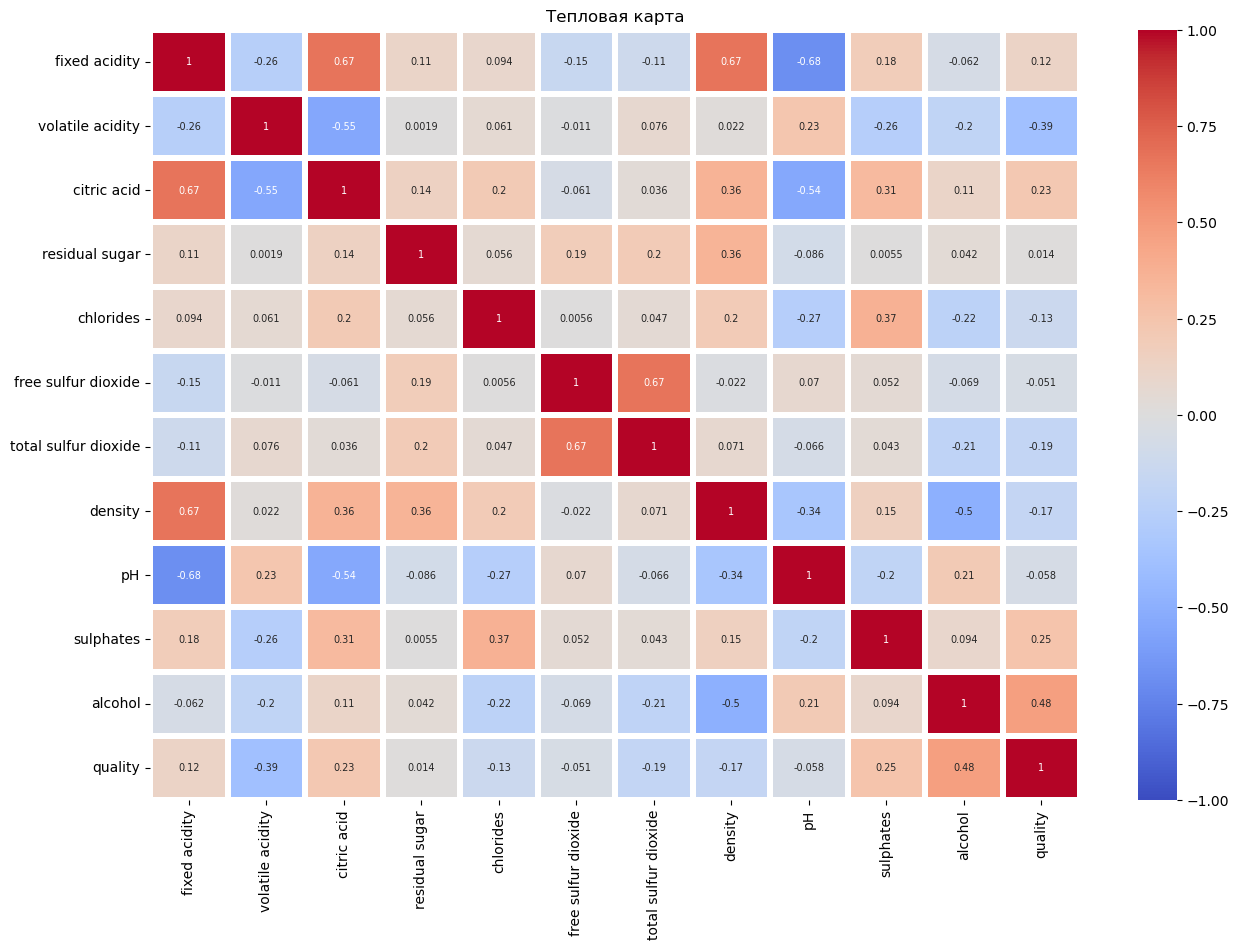

In [271]:
df_wine.describe()
df_wine.hist(figsize=(15,10),bins=40)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_wine.corr(),annot=True,linecolor='white',linewidth=4,cmap='coolwarm',annot_kws={'size':7},vmax=1,vmin=-1)
ax.set_title('Тепловая карта')

**Результат**:
* Количество строк: 1599 
* Количество столбцов: 12
* Пропущенные значения отсутствуют. Все химические показатели являются вещественным ТД, а качество – целым ТД. 

Прежде чем агрегировать, я хочу понять, а уместно ли вообще среднее и какую меру центральной тенденции будет правильно использовать в этом случае?
Задача 0. Выбор меры центральной тенденции
Как понять:
– Построить гистограмму распределения
– Пострить ящик с усами (boxplot)
– Изучить форму распределения и посчитать среднее,медиану,моду
– Сделать вывод и понять, с помощью какой меры будем строить следующую зависимость

Text(0, 0.5, 'Количество наблюдений')

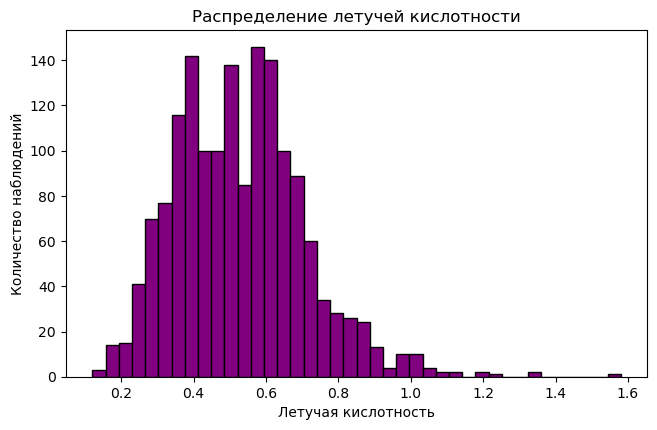

In [64]:
fig, ax  = plt.subplots(figsize=(7.5,4.5))
ax.hist(df_wine['volatile acidity'],bins=40,color='purple',edgecolor='black'); #можно количество бинов рассчитать по формулам,но я выбирал подбором по наиболее информативному распределению
ax.set_title('Распределение летучей кислотности')
ax.set_xlabel('Летучая кислотность')
ax.set_ylabel('Количество наблюдений')

Форма распределения ассиметричная, хвост тянется вправо. Большинство наблюдений (вин) имеют показатель летучей кислотности в диапозоне от 0.3 до 0.7. Есть несколько пиков в области 0.4-0.6, здесь сосредоточено "типичное" вино. Есть хвосты, которые могут искажать и "утягивать" за собой среднее. Есть выбросы (значения > 1.0), но их очень мало – это могут быть аномалии или редкие случаи,в принципе их можно проверить отдельно. 
Среднее значение может искажать картину, и для описания "типичного вина" лучше использовать медиану.
Также стоит учитывать редкие случаи с высокой кислотностью – они могут быть важны при анализе качества или интерпретации выбросов.

In [80]:
print(df_wine['volatile acidity'].mean())
print(df_wine['volatile acidity'].median()) 
print(df_wine['volatile acidity'].mode()[0])
q1 = df_wine['volatile acidity'].quantile(0.25)
q3 = df_wine['volatile acidity'].quantile(0.75)
iqr = q3 - q1
print(q1,q3,iqr)

0.5278205128205128
0.52
0.6
0.39 0.64 0.25


Посчитал различные меры и увидел, что действительно – среднее немного смещено в сторону выбросов. Наиболее предпочтительно выбрать медиану для дальнейшего изучения зависимости качества вина. Также по интерквартильному размаху можно увидеть, что половина всех вин лежит в диапозоне 0.25 (от 0.39 до 0.64)

In [118]:
df_anom = df_wine[(df_wine['volatile acidity'] > (q3 + iqr*1.5)) | (df_wine['volatile acidity'] < (q1 - iqr*1.5))]
df_anom.sort_values('volatile acidity')
print(len(df_anom)/len(df_wine))

0.011882426516572859


Сделал отдельный датасет с выбросом (в случае дальнейшего изучения аномалий и поиска каких-либо закономерностей). Также посчитал процент выбросов, чтобы понять, необходимо ли корректировать данные или нет. Процент выбросов оказался маленьким (около 1.2%), поэтому можно считать данные достаточно чистыми и не корректировать их.

<Axes: xlabel='volatile acidity', ylabel='Count'>

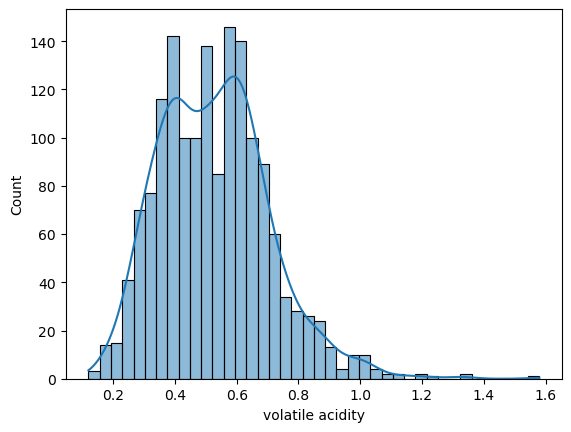

In [132]:
sns.histplot(df_wine['volatile acidity'],bins=40,kde=True)

Text(0, 0.5, 'Доля от всех вин (%)')

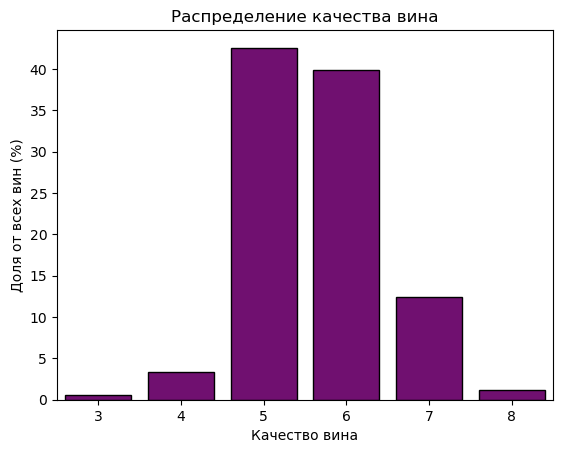

In [144]:
qual = df_wine['quality'].value_counts()
qual_norm = qual / qual.sum() * 100 #нормализовал,чтобы была нагляднее балансировка данных + возможность легко интерпретировать и сравнивать с другими выборками того же вина других размеров
sns.barplot(x=qual_norm.index,y=qual_norm,color='purple',edgecolor='black')
plt.title('Распределение качества вина')
plt.xlabel('Качество вина')
plt.ylabel('Доля от всех вин (%)')

Построил распределение целевой переменной (столбчатая диаграмма). Большинство вин имеет качество 5/6, данные несбалансированны, вина с качество 3/4/8 встречаются очень редко. Если далее будет строиться модель, то лучше использовать метрику f1_score, либо сгруппировать классы, которые редко встречаются.

Text(0.5, 1.0, 'Ящики с усами')

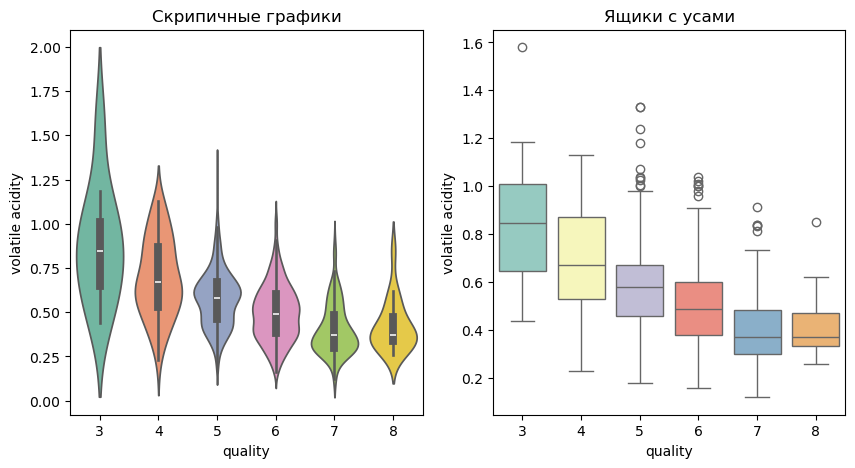

In [165]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.violinplot(x=df_wine['quality'],y=df_wine['volatile acidity'],data=df_wine,hue='quality',palette='Set2',legend=False,ax=ax[0])
ax[0].set_title('Скрипичные графики')
sns.boxplot(x=df_wine['quality'],y=df_wine['volatile acidity'],data=df_wine,hue='quality',palette='Set3',legend=False,ax=ax[1])
ax[1].set_title('Ящики с усами')

Text(0.5, 1.0, 'Тепловая карта')

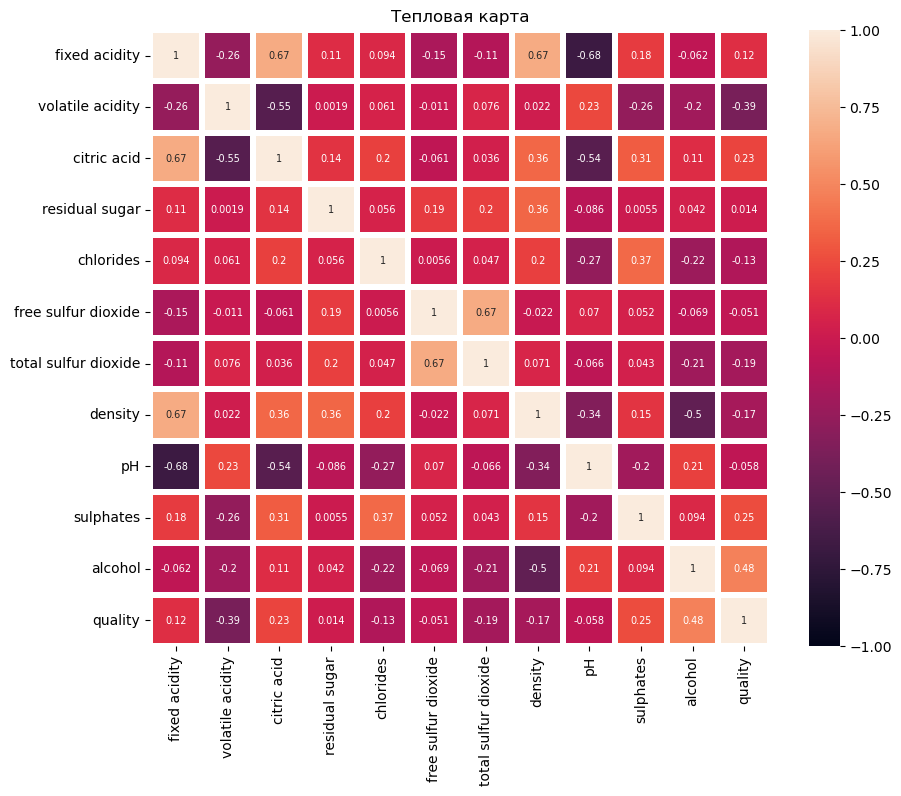

In [227]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_wine.corr(),annot=True,linecolor='white',linewidth=4,annot_kws={'size':7},vmax=1,vmin=-1)
ax.set_title('Тепловая карта')

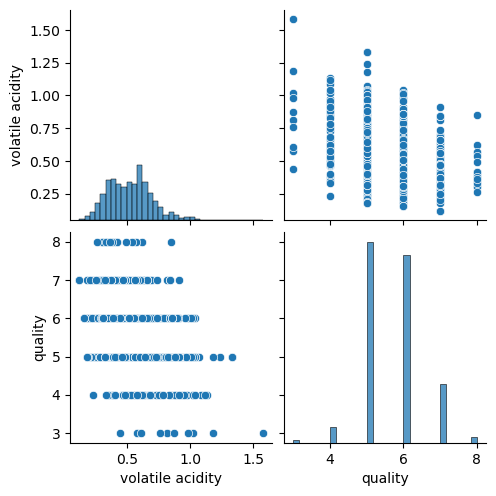

In [231]:
sns.pairplot(df_wine[['volatile acidity','quality']])

Задача 1: Изучить зависимость качества вина (quality) от кислотной летучести (volatile acidity)
Агрегирую данные по значению качества и беру средние показатели кислотной летучести. А почему я берю именно среднее, а не моду и не медиану?

<BarContainer object of 6 artists>

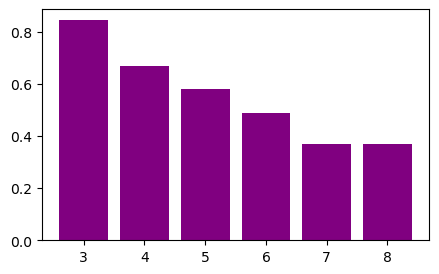

In [120]:
agg_wine = df_wine.groupby('quality')['volatile acidity'].median()
fig, ax  = plt.subplots(figsize=(5,3))
ax.bar(agg_wine.index,agg_wine,color='purple')